# Import

In [1]:
import procrustes_bg
import os
from procrustes_bg.transform import *
from procrustes_bg.plot import *
import pandas as pd

## V7_UTR

Specify folder. Repository contains all necessary files by default 

In [2]:
data_path = os.path.dirname(procrustes_bg.__file__)

**Prediction**

Set library prep kit version or path to custom model coefficients 

In [3]:
test_type = 'V7_UTR'

coeffs = os.path.join(f'{data_path}/data/{test_type}_coefficients.json')
ec_path = os.path.join(f'{data_path}/data/{test_type}_EC_exp.tsv')
polya_path = os.path.join(f'{data_path}/data/{test_type}_polyA_exp.tsv')
output_path_ccc = ''
output_path_exp = ''

print('Read EC dataset')
test_ec = pd.read_csv(ec_path, index_col=0, sep='\t')

print(f'Transformation from EC into poly-A. Test data - {test_type}')

test_results = Procrustes_predict(test_ec, path_to_coeffs=coeffs)

Read EC dataset
Transformation from EC into poly-A. Test data - V7_UTR


**Calculate concordance correlation coefficient (CCC)**

In [4]:
print('Read polyA dataset')

test_polya = pd.read_csv(polya_path, sep='\t', index_col=0)

print('Calculating concordance correlation coefficient')

ccc_before = calculate_ccc(test_ec, test_polya)
ccc_before.index = test_polya.columns
ccc_before.name = 'Before transformation'

ccc_after = calculate_ccc(test_results, test_polya)
ccc_after.index = test_polya.columns
ccc_after.name = 'After transformation'

ccc_results = pd.concat([ccc_before, ccc_after], axis=1)

print('Done!')

Read polyA dataset
Calculating concordance correlation coefficient
Done!


Devide CCC into three intervals

In [5]:
ccc_pv_before = pd.cut(ccc_results['Before transformation'], 
                       [-.1, .5, .8, 1.1], labels=['0-0.5', '0.5-0.8', '0.8-1.0'])
ccc_pv_before = ccc_pv_before.value_counts() / 20062
ccc_pv_before = ccc_pv_before

ccc_pv_after = pd.cut(ccc_results['After transformation'], 
                       [-.1, .5, .8, 1.1], labels=['0-0.5', '0.5-0.8', '0.8-1.0'])
ccc_pv_after = ccc_pv_after.value_counts() / 20062
ccc_pv_after = ccc_pv_after

ccc_pv = pd.concat([ccc_pv_before, ccc_pv_after], axis=1)
ccc_pv.columns = ['Before transformation', 'After transformation']

<Axes: >

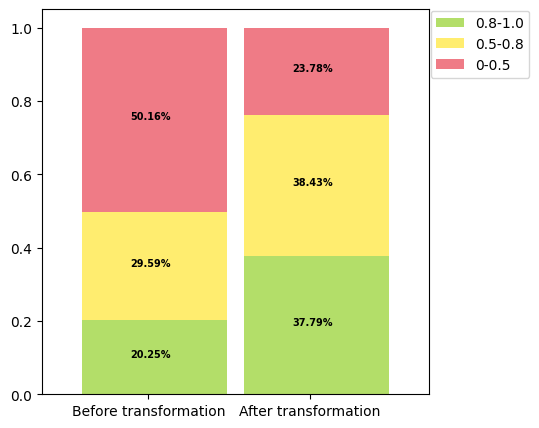

In [6]:
bot_bar_plot(ccc_pv.loc[['0.8-1.0', '0.5-0.8', '0-0.5']].T, palette=b_palette)

## V4 (MET500)

**Prediction**

Set library prep kit version or path to custom model coefficients 

In [7]:
test_type = 'V4'

coeffs = os.path.join(f'{data_path}/data/{test_type}_coefficients.json')
ec_path = os.path.join(f'{data_path}/data/{test_type}_EC_exp.tsv')
polya_path = os.path.join(f'{data_path}/data/{test_type}_polyA_exp.tsv')
output_path_ccc = ''
output_path_exp = ''

print('Read EC dataset')
test_ec = pd.read_csv(ec_path, index_col=0, sep='\t')

print(f'Transformation from EC into poly-A. Test data - {test_type}')

test_results = Procrustes_predict(test_ec, path_to_coeffs=coeffs)

Read EC dataset
Transformation from EC into poly-A. Test data - V4


**Calculate concordance correlation coefficient (CCC)**

In [8]:
print('Read polyA dataset')

test_polya = pd.read_csv(polya_path, sep='\t', index_col=0)

print('Calculating concordance correlation coefficient')

ccc_before = calculate_ccc(test_ec, test_polya)
ccc_before.index = test_polya.columns
ccc_before.name = 'Before transformation'

ccc_after = calculate_ccc(test_results, test_polya)
ccc_after.index = test_polya.columns
ccc_after.name = 'After transformation'

ccc_results = pd.concat([ccc_before, ccc_after], axis=1)

print('Done!')

Read polyA dataset
Calculating concordance correlation coefficient
Done!


Devide CCC into three intervals

In [9]:
ccc_pv_before = pd.cut(ccc_results['Before transformation'], 
                       [-.1, .5, .8, 1.1], labels=['0-0.5', '0.5-0.8', '0.8-1.0'])
ccc_pv_before = ccc_pv_before.value_counts() / 20062
ccc_pv_before = ccc_pv_before

ccc_pv_after = pd.cut(ccc_results['After transformation'], 
                       [-.1, .5, .8, 1.1], labels=['0-0.5', '0.5-0.8', '0.8-1.0'])
ccc_pv_after = ccc_pv_after.value_counts() / 20062
ccc_pv_after = ccc_pv_after

ccc_pv = pd.concat([ccc_pv_before, ccc_pv_after], axis=1)
ccc_pv.columns = ['Before transformation', 'After transformation']

<Axes: >

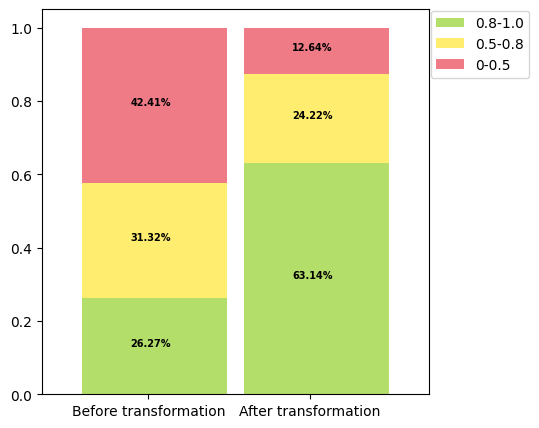

In [10]:
bot_bar_plot(ccc_pv.loc[['0.8-1.0', '0.5-0.8', '0-0.5']].T, palette=b_palette)

# End